In [91]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import statistics as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

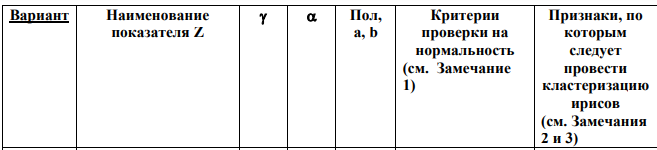

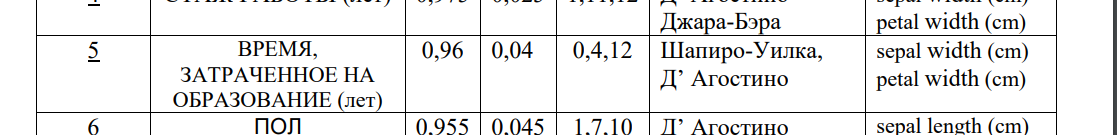

# 1 часть

In [92]:
data = pd.read_excel("LAB_4_DATA_2023.xlsx")
alpha = 0.04
gamma = 0.96
N = len(data)
data

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999
...,...,...,...,...
535,7.307693,12,1,9.500000
536,19.288462,14,1,17.299999
537,21.230770,12,1,27.520000
538,18.076923,13,1,3.880000


## 1. Найдите оценки параметров линейной регрессионной модели   зависимости ЗАРПЛАТЫ от Z.

In [93]:
X1 = data['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)']
Y1 = data['Зарплата (долл. в час)']

X1 = np.array(X1)
x1 = X1.reshape(len(X1),1)

model = LinearRegression().fit(x1, Y1)
determ = model.score(x1, Y1)
print('Коэффициент детерминации:', determ)
print('Пересечение:', model.intercept_) # b0
print('Коэффициент наклона:', model.coef_[0], '\n') # b1

Y1_predicted = model.predict(x1)
errors = Y1-Y1_predicted

print("Тест Шапиро-Уилка")
res_shap = sts.shapiro(errors)
print(res_shap)
if (res_shap.pvalue > alpha):
  print("Ошибки регрессии имеют нормальное распределение\n")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение\n")

print("Тест Д’ Агостино")
res_dago= sts.normaltest(errors)
print(res_dago)
if (res_dago.pvalue > alpha):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")

Коэффициент детерминации: 0.17249816081531233
Пересечение: -13.933465548912451
Коэффициент наклона: 2.4553205196847245 

Тест Шапиро-Уилка
ShapiroResult(statistic=0.7628457546234131, pvalue=3.651001188200427e-27)
Ошибки регрессии имеют НЕ нормальное распределение

Тест Д’ Агостино
NormaltestResult(statistic=393.2600421543511, pvalue=4.0240824426047195e-86)
Ошибки регрессии имеют НЕ нормальное распределение


## 1.1. Проверьте, обладает ли модель высокой объясняющей способностью, или же модель низкого качества (Для этого примените F-тест)

In [94]:
df1 = 1
df2 = N - 1 - 1
F_emp = (determ * df2 ) / ((1 - determ) * df1)
F_sts = sts.f.ppf(1 - alpha, df1, df2)
print("Посчитанное значение F эмпирическое", F_emp, "\nЗначение F кр", F_sts)
if F_emp > F_sts:
    print("Модель с высокой объясняющей способностью")
else:
    print("Модель низкого качества")

Посчитанное значение F эмпирическое 112.1496123924933 
Значение F кр 4.238411930265633
Модель с высокой объясняющей способностью


In [95]:
o = 1 - sts.f.cdf(F_emp, df1, df2) #Prob (F-statistic)
print(o), print(1-o)


1.1102230246251565e-16
0.9999999999999999


(None, None)

In [96]:
x1 = sm.add_constant(X1)

model1 = sm.OLS(Y1, x1)
results1 = model1.fit()

print(results1.summary())

                              OLS Regression Results                              
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.172
Model:                                OLS   Adj. R-squared:                  0.171
Method:                     Least Squares   F-statistic:                     112.1
Date:                    Sat, 23 Dec 2023   Prob (F-statistic):           6.22e-24
Time:                            15:27:29   Log-Likelihood:                -2155.5
No. Observations:                     540   AIC:                             4315.
Df Residuals:                         538   BIC:                             4324.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

## 2. Найдите оценки параметров линейной регрессионной модели   зависимости ЗАРПЛАТЫ от СТАЖА РАБОТЫ, ВРЕМЕНИ, ЗАТРАЧЕННОГО НА ОБРАЗОВАНИЕ, и ПОЛА РАБОТНИКА работника.

In [97]:
data = pd.read_excel("LAB_4_DATA_2023.xlsx")
X2 = data[['СТАЖ РАБОТЫ (лет)', 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)', 'ПОЛ (1-жен, 0- муж)']]
Y2 = data['Зарплата (долл. в час)']
x2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, x2)
results = model2.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.241
Model:                                OLS   Adj. R-squared:                  0.237
Method:                     Least Squares   F-statistic:                     56.68
Date:                    Sat, 23 Dec 2023   Prob (F-statistic):           7.74e-32
Time:                            15:27:29   Log-Likelihood:                -2132.2
No. Observations:                     540   AIC:                             4272.
Df Residuals:                         536   BIC:                             4290.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [98]:
o = 1 - sts.f.cdf(56.68, df1, df2) #Prob (F-statistic)
print(o), print(1-o)

2.1760371282653068e-13
0.9999999999997824


(None, None)

In [99]:
print('Коэффициент детерминации:', results.rsquared)
print('Пересечение:', results.params[0]) # b0
print('Коэффициент наклона:\n', results.params[1:]) # b1, b2, b3

Коэффициент детерминации: 0.2408483676272989
Пересечение: -19.691947095345
Коэффициент наклона:
 СТАЖ РАБОТЫ (лет)                          0.405677
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)    2.591137
ПОЛ (1-жен, 0- муж)                       -5.909050
dtype: float64


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\2273421890.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Пересечение:', results.params[0]) # b0


In [100]:
b = results.params
X0_ = data['СТАЖ РАБОТЫ (лет)']
X1_ = data['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)']
X2_ = data['ПОЛ (1-жен, 0- муж)']

x0 = np.array(X0_)
x1 = np.array(X1_)
x2 = np.array(X2_)

XXX = [x0,x1,x2]
XXX = np.array(XXX)
x = XXX.transpose()
X = sm.add_constant(x)

y_hat = b[0] + b[1] * x0 + b[2] * x1 + b[3] * x2

print(np.isclose(y_hat, results.predict(), atol=1e-4))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\2710291195.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = b[0] + b[1] * x0 + b[2] * x1 + b[3] * x2


In [101]:
Y2_predicted = results.predict()
errors2 = Y2 - Y2_predicted

print("Тест Шапиро-Уилка")
res_shap = sts.shapiro(errors2)
print(res_shap)
if (res_shap.pvalue > alpha):
  print("Ошибки регрессии имеют нормальное распределение\n")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение\n")

print("Тест Д’ Агостино")
res_dago= sts.normaltest(errors2)
print(res_dago)
if (res_dago.pvalue > alpha):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")

Тест Шапиро-Уилка
ShapiroResult(statistic=0.7591449022293091, pvalue=2.4353168442622826e-27)
Ошибки регрессии имеют НЕ нормальное распределение

Тест Д’ Агостино
NormaltestResult(statistic=404.75225464943424, pvalue=1.2857739834290298e-88)
Ошибки регрессии имеют НЕ нормальное распределение


## 2.3. Проверьте, обладает ли модель из п.3. высокой объясняющей способностью, или же модель низкого качества (Для этого примените F-тест)

In [102]:
m = 3
df1 = m
df2 = N - m - 1

RSS = sum((Y2_predicted - Y2.mean())**2)
ESS = sum(errors2**2)

F_emp = (RSS * df1) / (ESS * df2)
F_sts = sts.f.ppf(1 - alpha, df1, df2)
if(F_emp > F_sts):
  print("Модель обладает высокой объясняющей способностью")
else:
  print("Модель низкого качества")
F_emp, F_sts

Модель низкого качества


(0.0017757083708672683, 2.7893636484085436)

In [103]:
f_test2 = results.f_test("СТАЖ РАБОТЫ (лет) = ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет) = ПОЛ (1-жен, 0- муж) = 0")
f_test_sts = sts.f.ppf(1 - alpha, N - m - 1, m)
print(f"F-тест: {f_test2}")
if (f_test2.statistic > f_test_sts):
  print("Принимаем H1")
  print("Отражает истинную зависимость\n")
else:
  print("Принимаем H0\n")


F-тест: <F test: F=56.68376801296419, p=7.736950333452077e-32, df_denom=536, df_num=3>
Принимаем H1
Отражает истинную зависимость



In [104]:
print("H0: b0 = 0")
print("H1: b0 не равно 0, следовательно значимо")
Z = X.transpose().dot(X)
invZ = np.linalg.matrix_power(Z, -1)
# Z = np.empty(shape=(N, m + 1), dtype=float)
# Z[:, 0] = 1
# Z[:, 1:(m + 1)] = X2
# values_to_predict = np.array([[1.0, 4.0, 12.0, 0.0]])
# errors_square = np.square(errors2)
# s_e_2 = np.sum(errors_square) / (N - m - 1)
# invZ = np.linalg.inv(Z.T @ Z)
# temp = np.dot(values_to_predict, invZ)
# temp2 = np.dot(temp, values_to_predict.T)
s_e_2 = (1/(N - m - 1))*sum(errors2**2) # стандартная ошибка остатков

cob0 = np.sqrt(s_e_2) * np.sqrt(invZ[0, 0]) # стандартная ошибка коэфф

t_emp = b[0] / cob0
t_crit = sts.t.ppf(1 - alpha/2, N - m -1)

if (abs(t_emp) > t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")
t_emp, t_crit, cob0

H0: b0 = 0
H1: b0 не равно 0, следовательно значимо
Принимаем H1
Отражает истинную зависимость 


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\1875154083.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_emp = b[0] / cob0


(-4.515714386806478, 2.058759043823832, 4.36076009432279)

In [105]:
Z = X.transpose().dot(X)
invZ = np.linalg.matrix_power(Z, -1)
result = np.dot(invZ, Z)
result

array([[ 1.00000000e+00,  4.43953581e-14, -9.56526525e-15,
        -1.37737044e-15],
       [-2.13804668e-16,  1.00000000e+00, -8.55652355e-16,
         3.59955121e-17],
       [-3.00784788e-16, -3.28763002e-15,  1.00000000e+00,
        -5.88179679e-18],
       [-5.20417043e-16, -2.04457955e-15,  1.64451786e-15,
         1.00000000e+00]])

In [106]:
print("H0: b1 = 0")
print("H1: b1 не равно 0, следовательно значимо")

cob1 = np.sqrt(s_e_2) * np.sqrt(invZ[1,1])

t_emp = b[1] / cob1
t_crit = sts.t.ppf(1 - alpha/2, N - m - 1)

if (abs(t_emp) > t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")
t_emp, t_crit

H0: b1 = 0
H1: b1 не равно 0, следовательно значимо
Принимаем H1
Отражает истинную зависимость 


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\3878341164.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_emp = b[1] / cob1


(3.1491820841621547, 2.058759043823832)

In [107]:
print("H0: b2 = 0")
print("H1: b2 не равно 0, следовательно значимо")

cob2=np.sqrt(s_e_2) * np.sqrt(invZ[2,2])

t_emp = b[2] / cob2
t_crit = sts.t.ppf(1 - alpha/2, N - m - 1)

if (abs(t_emp) > t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")
t_emp, t_crit

H0: b2 = 0
H1: b2 не равно 0, следовательно значимо
Принимаем H1
Отражает истинную зависимость 


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\1267103977.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_emp = b[2] / cob2


(11.337301440662122, 2.058759043823832)

In [108]:
print("H0: b3 = 0")
print("H1: b3 не равно 0, следовательно значимо")

cob3=np.sqrt(s_e_2)*np.sqrt(invZ[3,3])

t_emp = b[3] / cob3
t_crit= sts.t.ppf(1 - alpha/2, N - m - 1)

if (abs(t_emp) > t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")
t_emp, t_crit

H0: b3 = 0
H1: b3 не равно 0, следовательно значимо
Принимаем H1
Отражает истинную зависимость 


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\1562054060.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_emp = b[3] / cob3


(-5.304485921474772, 2.058759043823832)

## 2.1. Как в среднем изменится ЗАРПЛАТА, если СТАЖ РАБОТЫ увеличится на 2 года?


In [109]:
print("Изменение ЗАРПЛАТЫ при увеличении стажа на 2 года:", results.params['СТАЖ РАБОТЫ (лет)'] * 2, "\n")

Изменение ЗАРПЛАТЫ при увеличении стажа на 2 года: 0.8113543980273479 



## 2.2. Какую в среднем прибавку к ЗАРПЛАТЕ  дает дополнительный год обучения?

In [110]:
print("Прибавка к ЗАРПЛАТЕ за каждый дополнительный год обучения:", results.params['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)'], "\n")

Прибавка к ЗАРПЛАТЕ за каждый дополнительный год обучения: 2.5911373236744275 



## 2.4. Значимо ли различаются зарплаты мужчины и женщины при прочих равных условиях (т.е. равных стаже и числу лет, затраченных на образование) ?

In [111]:
print("Прирост ЗАРПЛАТЫ для мужчин по сравнению с женщинами:", results.params['ПОЛ (1-жен, 0- муж)'])

Прирост ЗАРПЛАТЫ для мужчин по сравнению с женщинами: -5.909050234030843


## 2.5.  Можно ли считать, что при начислении зарплаты  имеет место дискриминация по гендерному признаку?

In [112]:
print("Так как коэф. b3 имеет значимость => в разноости зарплат имеет место дискриминация по гендерному признаку")

Так как коэф. b3 имеет значимость => в разноости зарплат имеет место дискриминация по гендерному признаку


# 2 Часть


## 2.8.  С надежностью  гамма постройте доверительные интервалы для теоретических  коэффициентов регрессии модели.

In [113]:
delta = sts.t.ppf((1 + gamma)/2, N - m - 1)
b0_left = b[0] - delta * cob0
b0_right = b[0] + delta * cob0
print(f"Доверительный интервал для b0: ({b0_left} ; {b0_right})")

b1_left = b[1] - delta * cob1
b1_right = b[1] + delta * cob1
print(f"Доверительный интервал для b1: ({b1_left} ; {b1_right})")

b2_left = b[2] - delta * cob2
b2_right = b[2] + delta * cob2
print(f"Доверительный интервал для b2: ({b2_left} ; {b2_right})")

b3_left = b[3] - delta * cob3
b3_right = b[3] + delta * cob3
print(f"Доверительный интервал для b3: ({b3_left} ; {b3_right})")

Доверительный интервал для b0: (-28.669701377478113 ; -10.71419281321189)
Доверительный интервал для b1: (0.14046814471895352 ; 0.6708862533083944)
Доверительный интервал для b2: (2.1206084745629887 ; 3.0616661727858663)
Доверительный интервал для b3: (-8.202450723693767 ; -3.615649744367919)


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\3172664577.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_left = b[0] - delta * cob0
C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\3172664577.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_right = b[0] + delta * cob0
C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\3172664577.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_left = b[1] - delt

In [114]:
confidence_intervals = results.conf_int(alpha= 1 - gamma)
print("Доверительные интервалы для коэффициентов регрессии:")
print(confidence_intervals)

Доверительные интервалы для коэффициентов регрессии:
                                                 0          1
const                                   -28.669701 -10.714193
СТАЖ РАБОТЫ (лет)                         0.140468   0.670886
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)   2.120608   3.061666
ПОЛ (1-жен, 0- муж)                      -8.202451  -3.615650


## 2.9.  С надежностью гамма найдите интервальную оценку прогнозной ЗАРПЛАТЫ работника , с  указанной в варианте гендерной принадлежностью, если  СТАЖ РАБОТЫ составляет а лет, а ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ, равно b годам.

In [122]:
a = 4.0
b = 12.0
gender = 0.0

values_to_predict = np.array([[1.0, a, b, gender]])
salary_predict = 0

for i in range(4):
  salary_predict += (results.params[i] * values_to_predict[0][i])

print(f"Предсказанная ЗАРПЛАТА: {salary_predict}")

-19.691947095345
Предсказанная ЗАРПЛАТА: 13.024409584802825


C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\953958160.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[0])
C:\Users\c0de1sl1fe\AppData\Local\Temp\ipykernel_14504\953958160.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  salary_predict += (results.params[i] * values_to_predict[0][i])


In [123]:
Z = np.empty(shape=(N, m + 1), dtype=float)
Z[:, 0] = 1
Z[:, 1:(m + 1)] = X2

errors_square = np.square(errors2)
s_e_2 = np.sum(errors_square) / (N - m - 1)
invZ = np.linalg.inv(Z.T @ Z)
temp = np.dot(values_to_predict, invZ)
temp2 = np.dot(temp, values_to_predict.T)
s_e_predict = np.sqrt(1 + temp2)

t = sts.t.ppf((1 + gamma)/2, N - m - 1)

U = np.sqrt(s_e_2) * s_e_predict * t
lower_bount = salary_predict - U
upper_bount = salary_predict + U
print(f'Довереительный интервал для предсказанного значения: ({lower_bount[0][0]}, {upper_bount[0][0]})')


Довереительный интервал для предсказанного значения: (-13.251982664183615, 39.300801833789265)


In [124]:
predicted_salary = results.predict(values_to_predict)
print(f"Предсказанная ЗАРПЛАТА: {predicted_salary[0]}")

predictions = results.get_prediction(values_to_predict)
predictions.summary_frame(alpha=1 - gamma)

Предсказанная ЗАРПЛАТА: 13.024409584802825


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.02441,2.063145,8.776892,17.271927,-13.251983,39.300802
